<a href="https://colab.research.google.com/github/shreyashankar17/Music-Genre-Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(Root)


In [ ]:
import numpy as np
import pandas as pd
import scipy
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import librosa
import librosa.display
import math
from IPython.display import Audio
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import specgram
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
!pip install librosa matplotlib



In [ ]:

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
audio_dataset_path='/content/drive/MyDrive/Colab Notebooks/Data/genres_original'
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
def features_extractor(file_name):
  audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs.T ,axis=0)
  return mfccs_scaled_features

In [ ]:
example_file = "/content/drive/MyDrive/Colab Notebooks/Data/genres_original/disco/disco.00000.wav"
signal, sample_rate = librosa.load(example_file)
print (signal)
print(sample_rate)

[-0.23202515 -0.23168945 -0.1979065  ... -0.17419434 -0.14257812
 -0.10617065]
22050


In [ ]:
FIG_SIZE = (16,8)

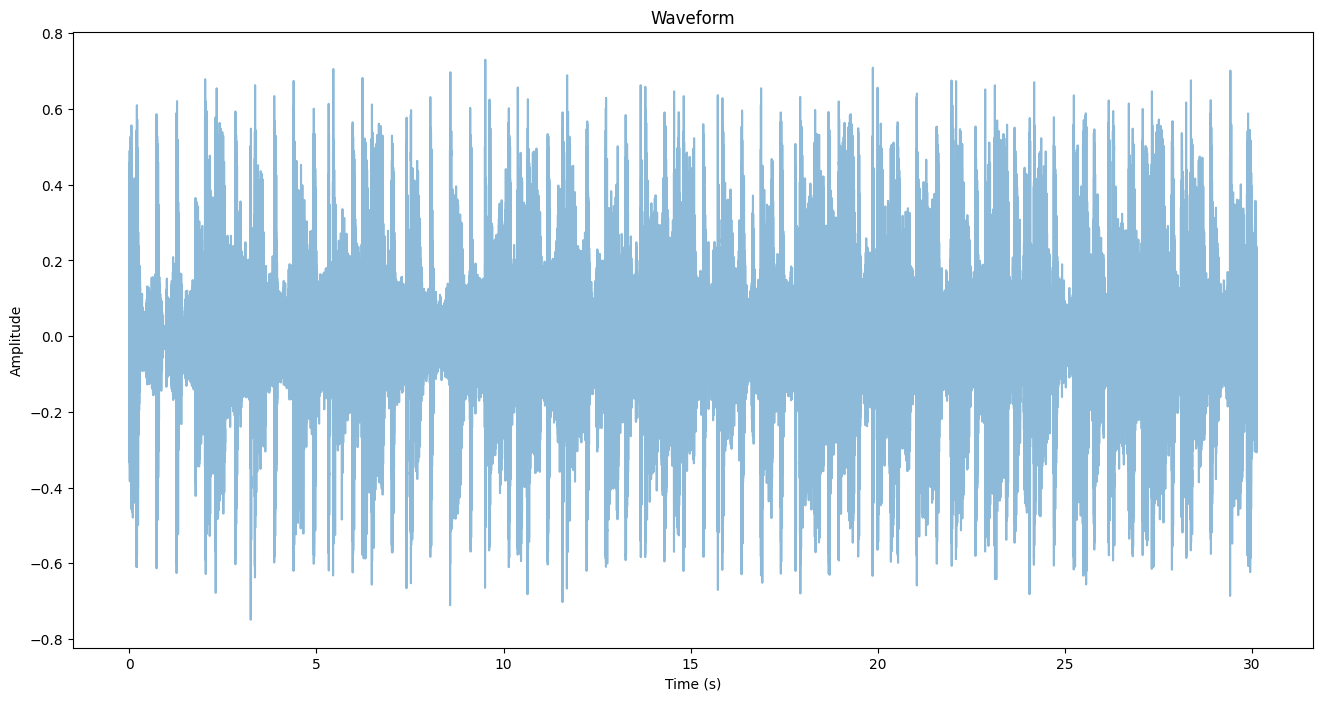

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded the audio signal and sample rate into the variables `signal` and `sample_rate`

# Calculate the time axis
duration = len(signal) / sample_rate
time = np.linspace(0, duration, len(signal))

plt.figure(figsize=FIG_SIZE)
plt.plot(time, signal, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()


In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [ ]:
# Create the Frequency variable
f = np.linspace(0,sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

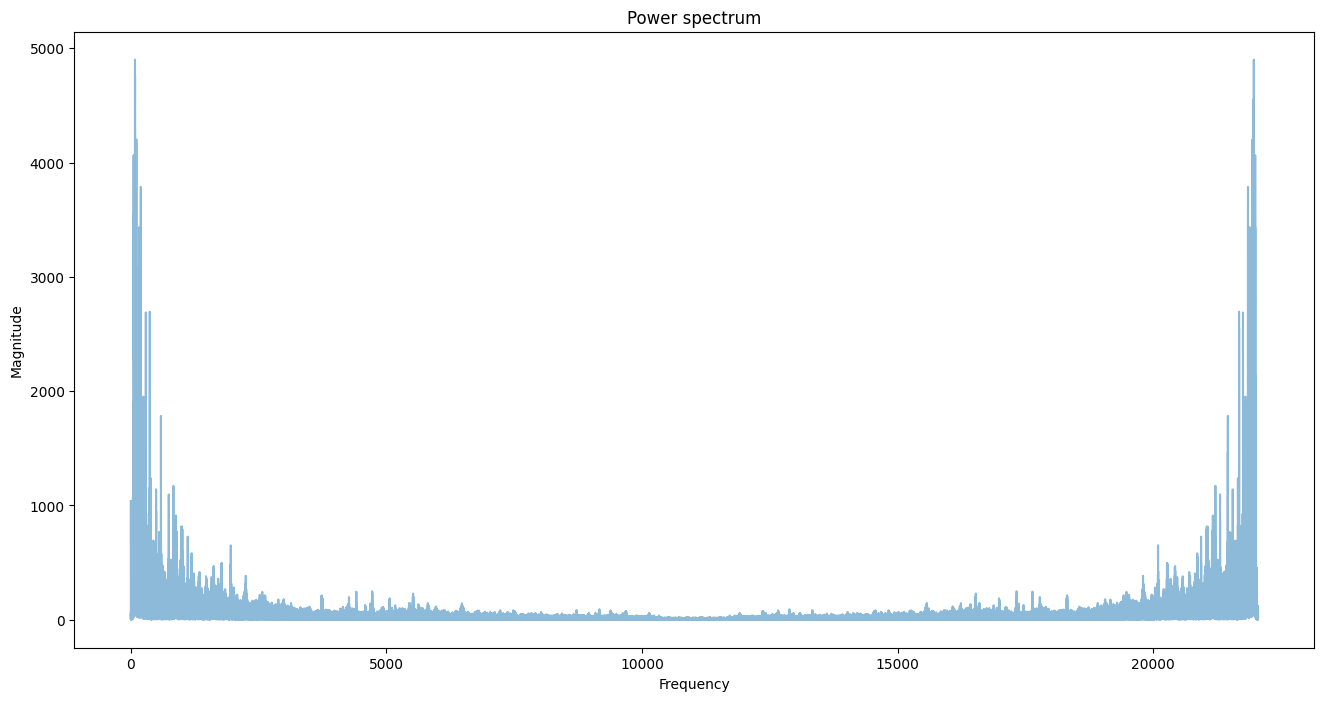

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]


Text(0.5, 1.0, 'Power Spectrum')

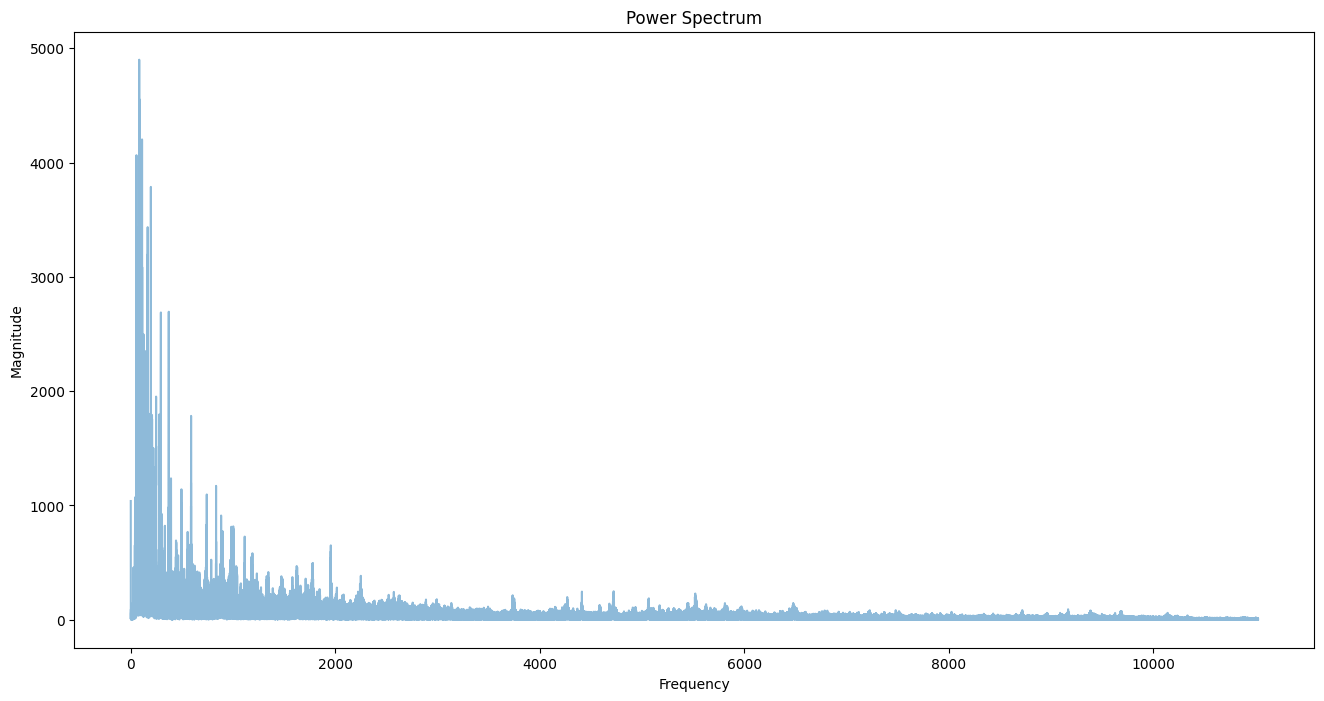

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5 )
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Spectrogram (STFT)
hop_length = 512 #num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
#Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

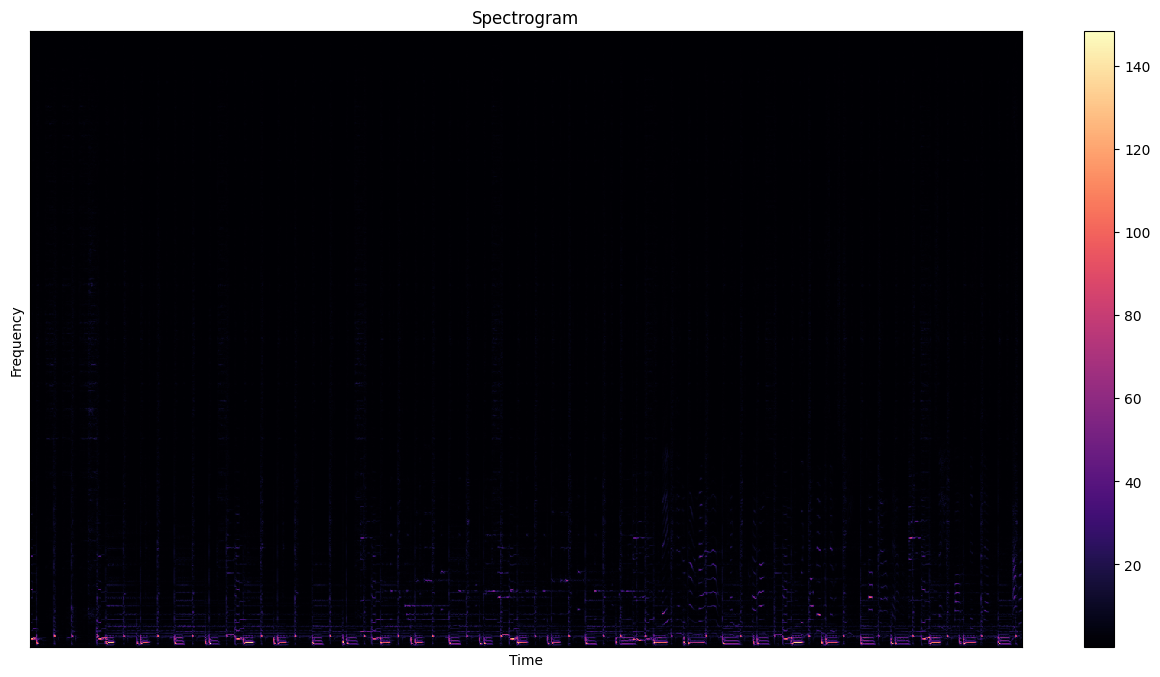

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)


Text(0.5, 1.0, 'Spectrogram (dB)')

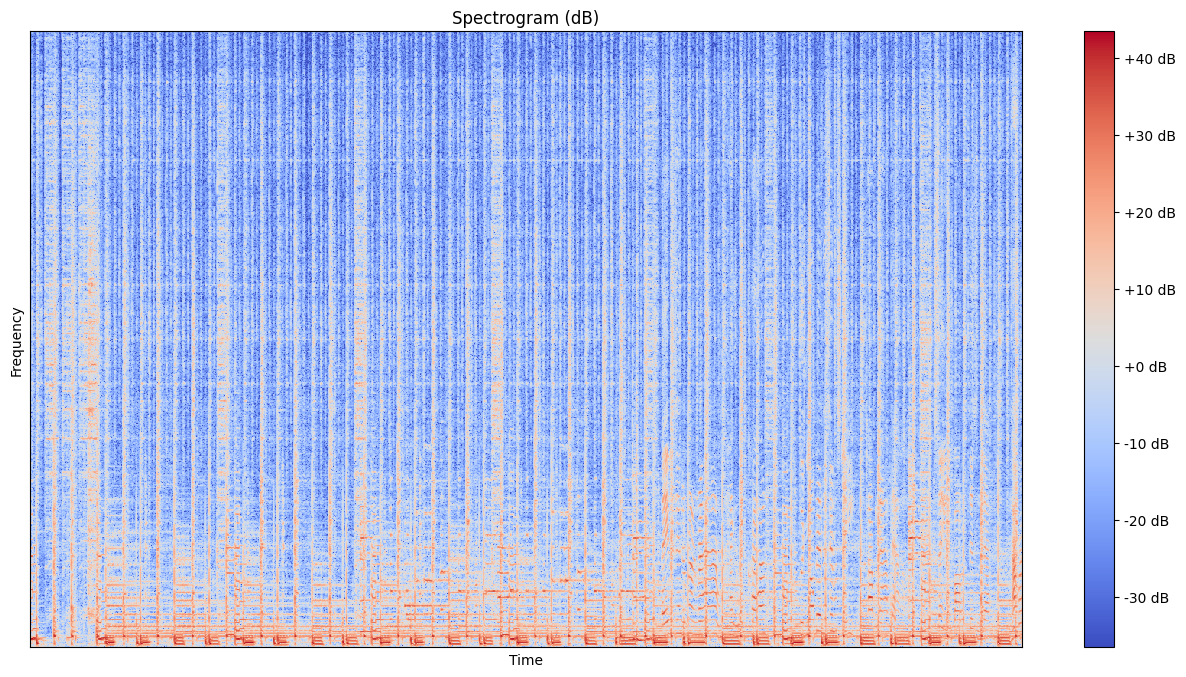

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

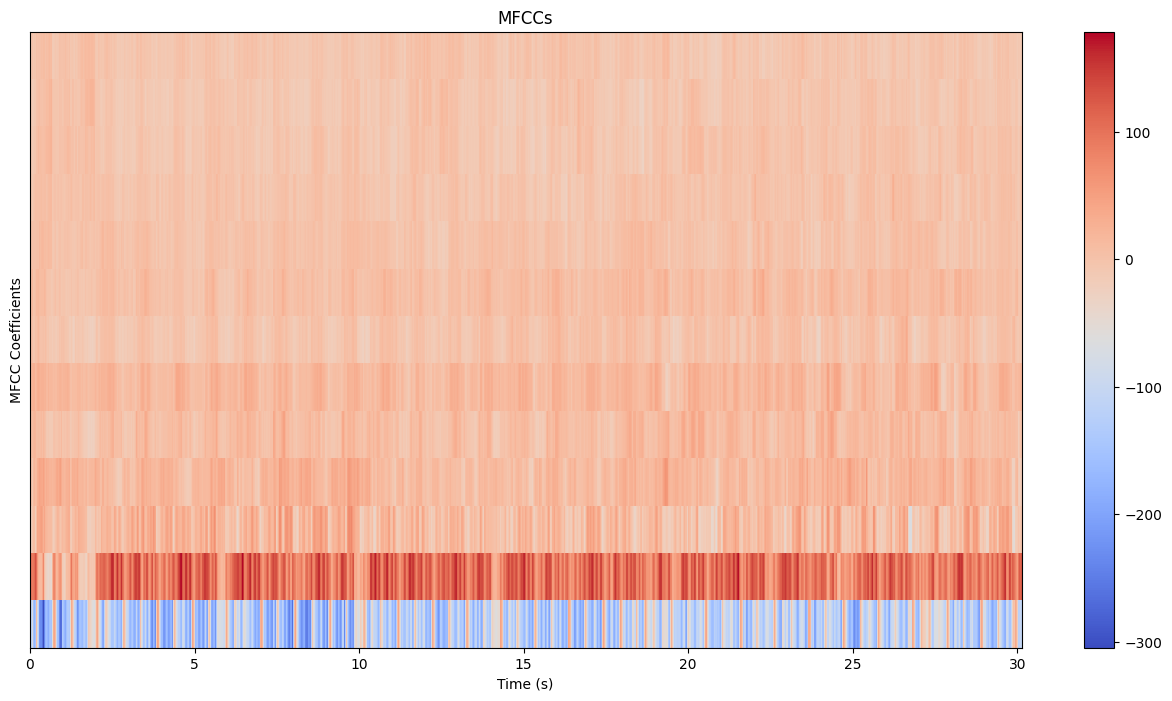

In [ ]:
# MFCCs (we use 13 MFCCs)
signal_mono = librosa.to_mono(signal)
MFCCs = librosa.feature.mfcc(y=signal_mono, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# Display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, x_axis='time', sr=sample_rate, hop_length=hop_length)
plt.colorbar()
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("MFCCs")
plt.show()


In [ ]:
import json
import os
import math

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 #Measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not audio_dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            genre_name = dirpath.split("/")[-1]
            data["mapping"].append(genre_name)
            print("\nProcessing: {}".format(genre_name))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):
 # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y = signal[start:finish], sr =sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length= hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

    print("MFCC data saved to", json_path)


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
SAMPLES_PER_TRACK = 660000

save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:2
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:3
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:4
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:5
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:6
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:7
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:8
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:9
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00007.wav, segment:10
/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country

In [ ]:
import random
import numpy as np
import tensorflow as tf
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
#path to json
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data_10.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
# load data
X, y = load_data(DATA_PATH)


Data succesfully loaded!


In [ ]:
X.shape

(9990, 129, 13)

In [ ]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


SIMPLE ANN

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(11, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1677)              0         
                                                                 
 dense (Dense)               (None, 512)               859136    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 1,007,627
Trainable params: 1,007,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
unique_train_labels = np.unique(y_train)
unique_test_labels = np.unique(y_test)
print("Unique labels in y_train:", unique_train_labels)
print("Unique labels in y_test:", unique_test_labels)

Unique labels in y_train: [ 0  1  2  3  4  5  6  8  9 10]
Unique labels in y_test: [ 0  1  2  3  4  5  6  8  9 10]


In [ ]:
max_label = np.argmax(y_train)
print("Maximum label value:", max_label)


Maximum label value: 2


In [ ]:
max_label = np.argmax(y_test)
print("Maximum label value:", max_label)


Maximum label value: 2


In [ ]:
history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=11),
                    validation_data=(X_test, keras.utils.to_categorical(y_test, num_classes=11)),
                    batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 5s 18ms/step - loss: 5.9930 - accuracy: 0.2079 - val_loss: 2.2669 - val_accuracy: 0.1354
Epoch 2/50
219/219 [==============================] - 4s 17ms/step - loss: 2.2424 - accuracy: 0.1666 - val_loss: 2.2288 - val_accuracy: 0.1501
Epoch 3/50
219/219 [==============================] - 5s 23ms/step - loss: 2.2150 - accuracy: 0.1702 - val_loss: 2.2186 - val_accuracy: 0.1474
Epoch 4/50
219/219 [==============================] - 4s 16ms/step - loss: 2.1883 - accuracy: 0.1630 - val_loss: 2.1841 - val_accuracy: 0.1528
Epoch 5/50
219/219 [==============================] - 4s 16ms/step - loss: 2.1866 - accuracy: 0.1582 - val_loss: 2.1627 - val_accuracy: 0.1835
Epoch 6/50
219/219 [==============================] - 4s 17ms/step - loss: 2.2063 - accuracy: 0.1573 - val_loss: 2.1970 - val_accuracy: 0.1574
Epoch 7/50
219/219 [==============================] - 5s 22ms/step - loss: 2.1570 - accuracy: 0.1720 - val_loss: 2.2131 - val_accuracy: 0.1348

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

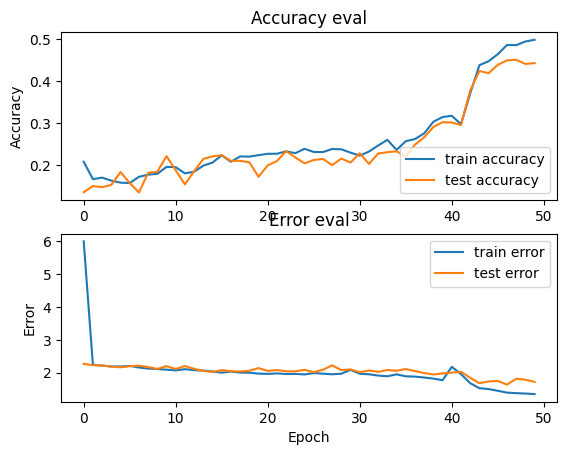

In [ ]:

# plot accuracy and error as a function of the epochs
plot_history(history)

MANAGING OVERFITTING

In [45]:
# build network topology
model_regularized = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # output layer
    keras.layers.Dense(11, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Path to json
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data_10.json"

def load_data(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")
    print("Loaded data shapes - X:", X.shape, "y:", y.shape)

    return X, y

# Load data
X, y = load_data(DATA_PATH)

# Convert labels to one-hot encoding
y = to_categorical(y)

# Print shapes of input data
print("Input data shapes - X:", X.shape, "y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of train and test sets
print("Train set shapes - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test set shapes - X_test:", X_test.shape, "y_test:", y_test.shape)

# Train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


Data successfully loaded!
Loaded data shapes - X: (9990, 129, 13) y: (9990,)
Input data shapes - X: (9990, 129, 13) y: (9990, 11)
Train set shapes - X_train: (6993, 129, 13) y_train: (6993, 11)
Test set shapes - X_test: (2997, 129, 13) y_test: (2997, 11)
Epoch 1/100
219/219 [==============================] - 5s 20ms/step - loss: 24.1717 - accuracy: 0.1717 - val_loss: 3.6508 - val_accuracy: 0.2766
Epoch 2/100
219/219 [==============================] - 5s 25ms/step - loss: 6.8425 - accuracy: 0.1806 - val_loss: 3.3735 - val_accuracy: 0.2336
Epoch 3/100
219/219 [==============================] - 4s 19ms/step - loss: 4.6555 - accuracy: 0.1793 - val_loss: 3.3744 - val_accuracy: 0.2349
Epoch 4/100
219/219 [==============================] - 4s 18ms/step - loss: 3.9821 - accuracy: 0.1922 - val_loss: 3.4022 - val_accuracy: 0.2299
Epoch 5/100
219/219 [==============================] - 5s 23ms/step - loss: 3.7499 - accuracy: 0.2005 - val_loss: 3.3464 - val_accuracy: 0.2629
Epoch 6/100
219/219 [===

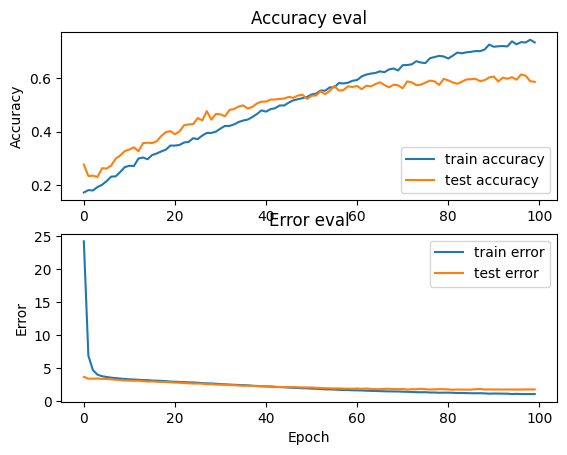

In [46]:

# plot accuracy and error as a function of the epochs
plot_history(history)



Convolutional Neural Network

In [47]:
# Validation and test split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [48]:
X_train.shape

(5244, 129, 13, 1)

In [49]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [50]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(11, activation='softmax'))

In [51]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:

# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
164/164 [==============================] - 14s 79ms/step - loss: 2.6854 - accuracy: 0.1806 - val_loss: 2.0122 - val_accuracy: 0.3065
Epoch 2/100
164/164 [==============================] - 13s 81ms/step - loss: 2.0312 - accuracy: 0.3223 - val_loss: 1.6731 - val_accuracy: 0.4122
Epoch 3/100
164/164 [==============================] - 13s 78ms/step - loss: 1.7814 - accuracy: 0.3823 - val_loss: 1.5155 - val_accuracy: 0.4545
Epoch 4/100
164/164 [==============================] - 13s 82ms/step - loss: 1.6460 - accuracy: 0.4239 - val_loss: 1.4175 - val_accuracy: 0.4929
Epoch 5/100
 77/164 [=============>................] - ETA: 5s - loss: 1.5738 - accuracy: 0.4472

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
model_cnn.save("Music_Genre_10_CNN")

In [ ]:
model_cnn.save("Music_Genre_10_CNN.keras")

In [ ]:

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.keras")


In [ ]:
# Test the prediction with a sample from the test set
sample_index = 0
X_to_predict = X_test[sample_index]
y_to_predict = y_test[sample_index]

Prediction on Test Set

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded arrays
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]


In [ ]:
X_to_predict.shape

In [ ]:
print("Real Genre:", np.argmax(y_to_predict))


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict.squeeze() # remove the extra dimension
X_to_predict = X_to_predict.reshape(1, X_to_predict.shape[0], X_to_predict.shape[1], 1)
  # array shape (1, 129, 13, 1)



In [ ]:
X_to_predict.shape

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

In [ ]:
# Pick a sample to predict from the test set
sample_index = 100
X_to_predict = X_test[sample_index]
y_to_predict = y_test[sample_index]

# Reshape the input to a 4D array
X_to_predict = X_to_predict.reshape(1, X_to_predict.shape[0], X_to_predict.shape[1], 1)

# Perform prediction
prediction = model_cnn.predict(X_to_predict)

# Get the predicted genre
predicted_genre = np.argmax(prediction)

print("Predicted Genre:", predicted_genre)
print("Real Genre:", np.argmax(y_to_predict))


In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", np.argmax(y_to_predict))

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

In [ ]:
len(X_test)

In [ ]:
for n in range(10):

  i = random.randint(0, len(X_test) - 1)
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", np.argmax(y_to_predict))

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))

Prediction on New Songs


In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [ ]:
# Audio files pre-processing
import librosa
import math

SAMPLE_RATE = 22050
NUM_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512
MAX_SEQUENCE_LENGTH = 130  # Maximum sequence length for padding/truncating

def process_input(audio_file, track_duration):
    # Calculate number of segments
    TRACK_DURATION = track_duration  # measured in seconds
    SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
    NUM_SEGMENTS = 1
    samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

    signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)



    mfccs = []
    for d in range(NUM_SEGMENTS):
        # Calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # Extract mfcc
        mfcc = librosa.feature.mfcc(y= signal[start:finish], sr= sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
        mfcc = mfcc.T

        # Pad or truncate the mfcc sequence to match the desired input shape
        mfcc = pad_or_truncate_sequence(mfcc, MAX_SEQUENCE_LENGTH)

        # Add the mfcc to the list
        mfccs.append(mfcc)

    # Convert the list of mfccs to a numpy array
    mfccs = np.array(mfccs)

    return mfccs
 # Function to pad or truncate a sequence to a specific length
def pad_or_truncate_sequence(sequence, max_length):
    if len(sequence) < max_length:
        # Pad sequence with zeros
        sequence = np.pad(sequence, ((0, max_length - len(sequence)), (0, 0)), "constant")
    else:
        # Truncate sequence
        sequence = sequence[:max_length]
    return sequence

In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/Colab Notebooks/Data/Bryan Mathys - It's Not Hard to Get Lost.mp3", 30)
new_input_mfcc = new_input_mfcc.squeeze()

print(type(new_input_mfcc))
print(new_input_mfcc.shape)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])